# Lab 2 - Probabilities, Distributions, and Statistical Questions
## William Olsen, partners with Jennifer Vo

In this lab we will become more familiar with probabilites, distributions, and statistical questions

In [14]:
# first lets import the required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

## Problem 1

For this problem lets consier that we are looking for gamma-ray sources.  These sources are being detected by a telescope pointed off into space.  In outer space we have the cosmic background radiation which will be the background distribution for our telescope which we are using to detect gamma-ray sources.  This cosmic background happens to be modeled by precisely the Poisson distribution.  Now we would like to ask the following question regarding our background gamma-ray sources:

> What is the probability that cosmic-ray background would have provided us with a measurement signal-like or more than our actual signal?

For this problem we will assume that in a single day the average number of background cosmic-rays is 2.7 while the average number of gamma-rays is emitted by our hypothetical source is 4.1.

### Part A

Let us first observe how the probability distribution of the background varies as we integrate (or sum) for more days.  We will observe the resulting distributions after 0, 1, 2, and 3 convolutuons with itself.

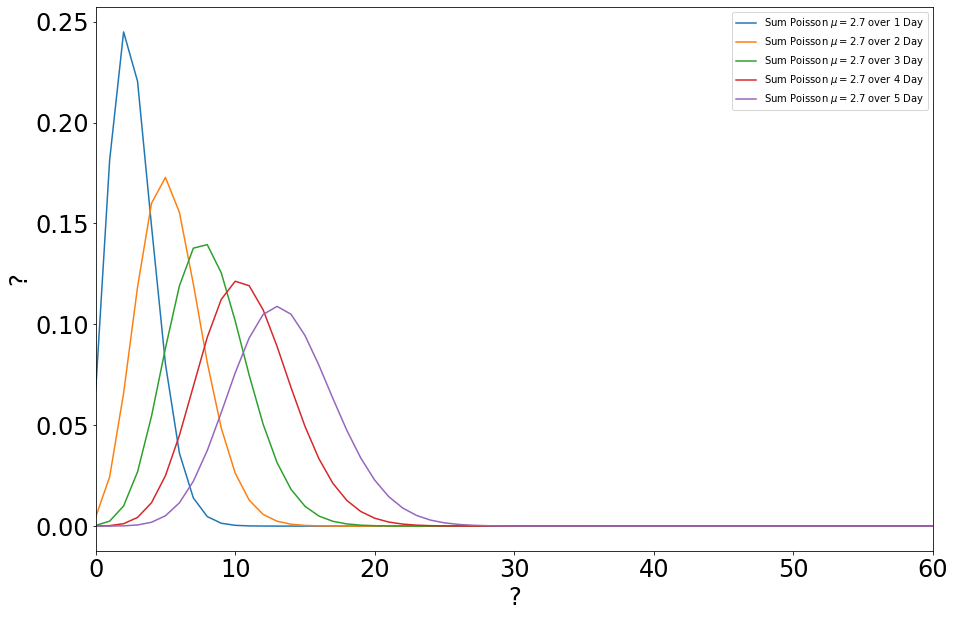

In [17]:
# define our parameters
gr_rate = 4.1 # gamma rays per day
cr_rate = 2.7 # cosmic rays per day

xs_0_conv = np.linspace(0, 60, 61)
probs_0_conv = stats.poisson.pmf(xs_0_conv, cr_rate)
plt.plot(xs_0_conv, probs_0_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 1 Day')

probs_1_conv = np.convolve(probs_0_conv, probs_0_conv)
xs_1_conv = np.linspace(0, len(probs_1_conv)-1, len(probs_1_conv))
plt.plot(xs_1_conv, probs_1_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 2 Day')

probs_2_conv = np.convolve(probs_1_conv, probs_0_conv)
xs_2_conv = np.linspace(0, len(probs_2_conv)-1, len(probs_2_conv))
plt.plot(xs_2_conv, probs_2_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 3 Day')

probs_3_conv = np.convolve(probs_2_conv, probs_0_conv)
xs_3_conv = np.linspace(0, len(probs_3_conv)-1, len(probs_3_conv))
plt.plot(xs_3_conv, probs_3_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 4 Day')

probs_4_conv = np.convolve(probs_3_conv, probs_0_conv)
xs_4_conv = np.linspace(0, len(probs_4_conv)-1, len(probs_4_conv))
plt.plot(xs_4_conv, probs_4_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 5 Day')

plt.tick_params(labelsize=24)
plt.xlim(0, 60)
plt.xlabel('?', fontdict={'size':24})
plt.ylabel('?', fontdict={'size':24})
plt.legend()
plt.show()

From the resulting graph above we see that as we sum accross more days our probabilities spread out over a larger range of the domain.  In additon we see that the peak of our distribution shifts to the right as we sum over more days and the width of our distribution increases.  Comparing to the Gaussian it is not suprising that the Poisson's width increases as we average more distributions together as this is the same behavor that we see with the Gaussian.


### Part B


To see if the distribution is still Poisson after averaging over 5 days we will plot the summed distribution on the semi-log scale and compare it to a classic Poisson over just one day.

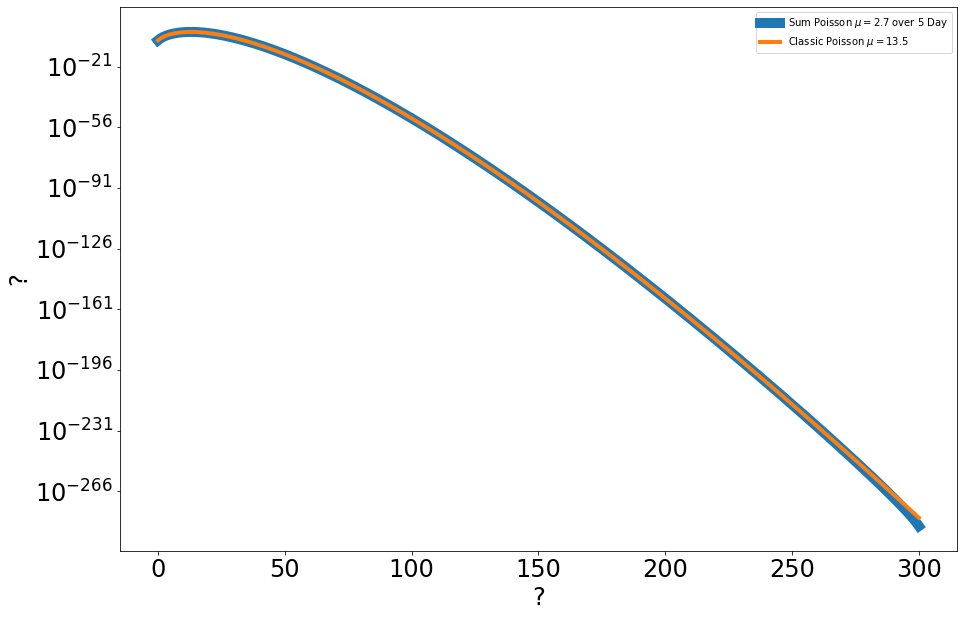

In [20]:
plt.plot(xs_4_conv, probs_4_conv, label=f'Sum Poisson $\mu={cr_rate}$ over 5 Day', linewidth=10)

xs_semi_log = np.linspace(0, xs_4_conv[-1], len(xs_4_conv))
probs_semi_log = stats.poisson.pmf(xs_semi_log, cr_rate * 5)
plt.plot(xs_semi_log, probs_semi_log, label=f'Classic Poisson $\mu={cr_rate*5}$', linewidth=4)

plt.tick_params(labelsize=24)
plt.yscale('log')
plt.xlabel('?', fontdict={'size':24})
plt.ylabel('?', fontdict={'size':24})
plt.legend()
plt.show()

Mathematically we would expect a Poisson to stay as a Poisson distribution regardless of how many we average because the Poisson distribution is discrete and it is largly skewed it will take a very long time to converge to a Gaussian, if even at all.

TODO complete explaination


### Part C


Now we will observe how the Poisson distribution changes as we average days.  Let us first visualize the same day ranges as we did previously for the sum but for the average.

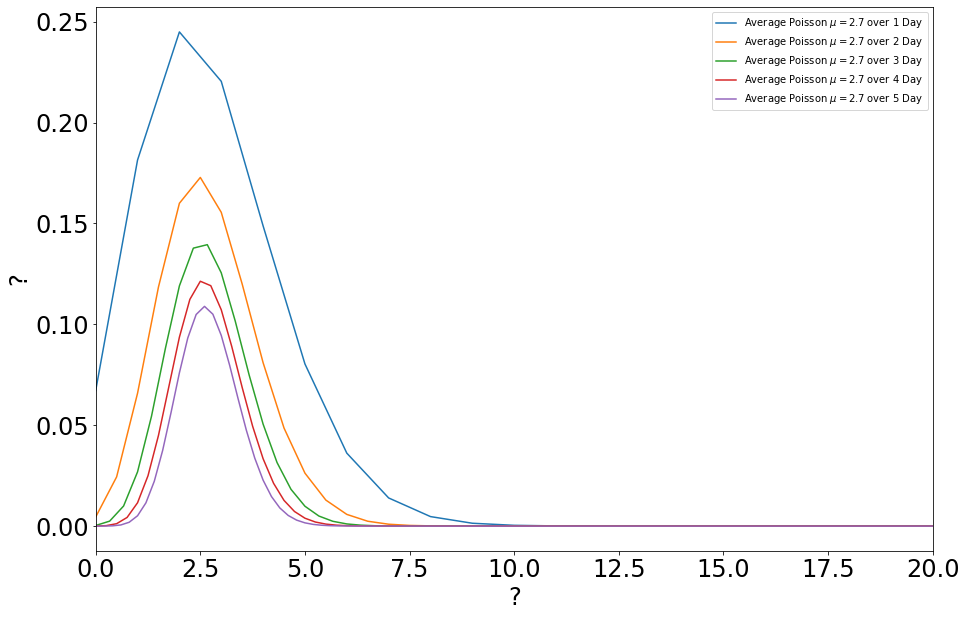

In [21]:
xs_0_conv_avg = xs_0_conv
plt.plot(xs_0_conv_avg, probs_0_conv, label=f'Average Poisson $\mu={cr_rate}$ over 1 Day')

xs_1_conv_avg = xs_1_conv / 2
plt.plot(xs_1_conv_avg, probs_1_conv, label=f'Average Poisson $\mu={cr_rate}$ over 2 Day')

xs_2_conv_avg = xs_2_conv / 3
plt.plot(xs_2_conv_avg, probs_2_conv, label=f'Average Poisson $\mu={cr_rate}$ over 3 Day')

xs_3_conv_avg = xs_3_conv / 4
plt.plot(xs_3_conv_avg, probs_3_conv, label=f'Average Poisson $\mu={cr_rate}$ over 4 Day')

xs_4_conv_avg = xs_4_conv / 5
plt.plot(xs_4_conv_avg, probs_4_conv, label=f'Average Poisson $\mu={cr_rate}$ over 5 Day')

plt.tick_params(labelsize=24)
plt.xlim(0, 20)
plt.xlabel('?', fontdict={'size':24})
plt.ylabel('?', fontdict={'size':24})
plt.legend()
plt.show()

From the above plots we see that while the location of the peak for each average distribution stays the same, the amplitude of the peak decreases as we average over more days.  Additionally we see that the standard deviation decreases as we average over more days.  This is to be expected because if we are averaging the results from 5 different days than the events further from the mean will become less likely as for them to occur they must occur on all 5 days - and they were already low probability events to begin with.

Now to get a better idea of the resulting distribuition we will view the result of averaging 5 days on a semi-log plot.

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60.]


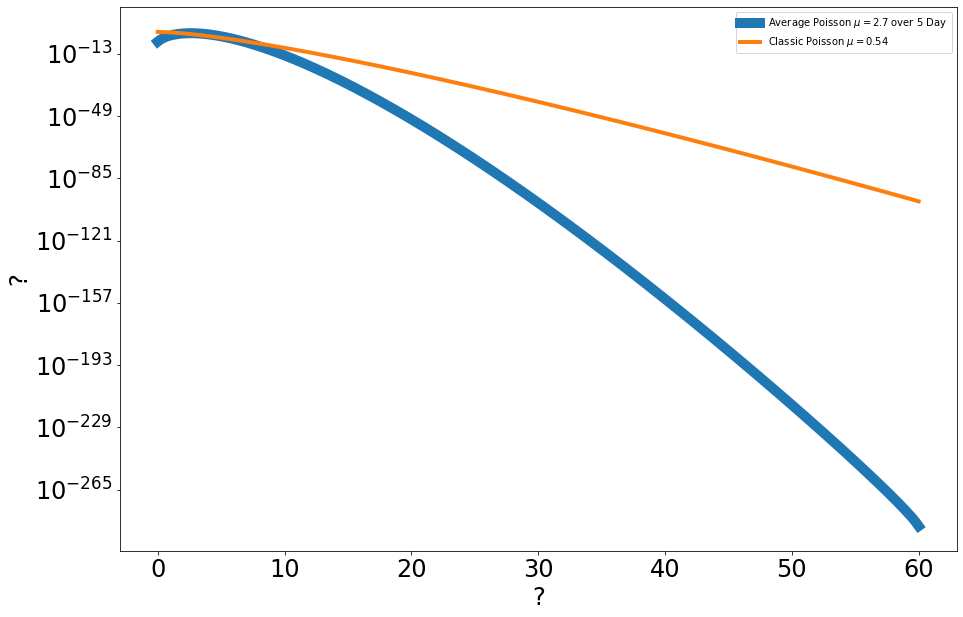

In [22]:
plt.plot(xs_4_conv_avg, probs_4_conv, label=f'Average Poisson $\mu={cr_rate}$ over 5 Day', linewidth=10)

xs_semi_log_avg = np.linspace(0, 60, 61)
probs_semi_log_avg = stats.poisson.pmf(xs_semi_log_avg, cr_rate / 5)
print(xs_semi_log_avg)
plt.plot(xs_semi_log_avg, probs_semi_log_avg, label=f'Classic Poisson $\mu={cr_rate / 5}$', linewidth=4)

plt.tick_params(labelsize=24)
plt.yscale('log')
plt.xlabel('?', fontdict={'size':24})
plt.ylabel('?', fontdict={'size':24})
plt.legend()
plt.show()

From the view on a semi-log plot we see that the average result is beginning to diverge from the standard Poisson distribution with an equivalent standard deviation as the averaged distribution seen in blue.  This is opposite to what we saw with the sum distribution in the previous part as that distribution still resembled a Poisson distribution.

If we were to continue this process our average poisson distribution would eventually converge to, approximately, a Gaussian distribution.  This reuslt is exactly the central limit in action and we only see it with the average of Poisson distributions - not the sum.

### Part D

Let's suppose that over a range of 4 days we saw $4*4.1=16.4$ gamma rays.  We would like to determine the probability that this was due to the background distribution.  We will ask the following question:

> What is the probability that the background distribution of the average of a Poisson distribution over 4 days, with a parameter of 5.2 cosmic-rays/day, produces a signal that is as signal-like or more than my canidate of 30.8 gamma rays?

Mathematically, we can represent this question as the following:

$$\text{Probability}=\int_{16.4}^\infty \text{pdf}(x)dx$$

In [30]:
# lets define our canidate
canidate = 4 * gr_rate

# we must evaluate the CDF using a reiman sum
# first we will compute the bin side
poisson_4_days_bin_width = xs_3_conv[-1] / len(xs_3_conv)

# now we can evaluate the reiman sum
area_under_4_day_curve = 0
i = 0
for probability in probs_3_conv:
    if xs_3_conv_avg[i] >= canidate:
        area_under_4_day_curve += poisson_4_days_bin_width * probability
    i+=1
        
# now that we have the area under the curve let's convert that value to a sigma
sigma_4_days = stats.norm.ppf(area_under_4_day_curve)
sigma_4_days = abs(sigma_4_days) # can take positive value due to symmetry

# print results
print(f'Provided we have a canidate value of {canidate} gamma rays / day, the probability')
print(f'this is caused by the background is {area_under_4_day_curve} which corresponds to')
print(f'a sigma value of {sigma_4_days:.3f}')

Provided we have a canidate value of 16.4 gamma rays / day, the probability
this is caused by the background is 7.145176784947744e-30 which corresponds to
a sigma value of 11.293


From the above computation we found that it is _extremly_ unlikely that a obseration of $16.4$ gamma rays would be due to the background distribution.  Our results were that this has a probability of $7.145*10^{-30}$ to be caused by the background which is equivalent to a sigma of $11.293\sigma$

## Problem 2

## Problem 3

## Problem 4